# Exercises

### 1. Try to build a classifier for the MNIST dataset that achieves over 97% accuracy on the test set. Hint: the KNeighborsClassifier works quite well for this task; you just need to find good hyperparameter values (try a grid search on the weights and n_neighbors hyperparameters).

In [501]:
# import libs
from sklearn.datasets import fetch_openml
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV




# get data from MNIST
mnist = fetch_openml('mnist_784', as_frame=False)
X, y = mnist.data, mnist.target

# Train/Test set (Data already shuffled)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

some_digit = X_train[0] # some_digit = "5"

In [5]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [6]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
knn_clf.predict([some_digit]) # Some digit = "5"

array(['5'], dtype=object)

In [7]:
y_train_knn_acc = cross_val_score(knn_clf, X_train, y_train, cv=3, scoring="accuracy")

y_train_knn_acc

array([0.9676 , 0.9671 , 0.96755])

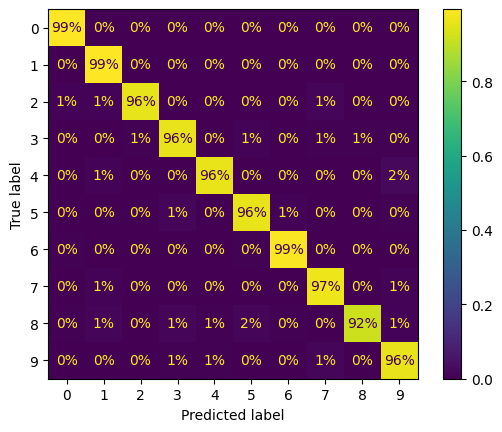

In [8]:
# Confusion Matrix

plt.rc('font', size=10)  # extra code – make the text smaller
ConfusionMatrixDisplay.from_predictions(y_train, y_train_knn_pred, normalize="true", values_format=".0%")
plt.show()

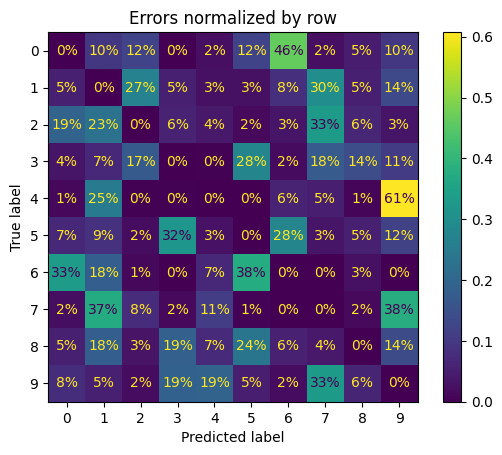

In [9]:
s_weight = (y_train_knn_pred != y_train)

plt.rc('font', size=10)  # extra code
ConfusionMatrixDisplay.from_predictions(y_train, y_train_knn_pred, sample_weight=s_weight,  normalize="true", values_format=".0%")
plt.title("Errors normalized by row")
plt.show()

So, using KNN we were able to observe some things:
- KNN already provides accuracies above 96%
- The digit "8" was the one that presented the most classification errors (92%)
- 61% of the "4" values were confused with digits "9"

In [55]:
param_grid = {
    'n_neighbors': [3,5,7,10],
    'leaf_size': [20,30,50] 
}

knn_grid_search = GridSearchCV(knn_clf, param_grid, cv=3, scoring='accuracy')

In [57]:
knn_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [20, 30, 50],
                         'n_neighbors': [3, 5, 7, 10]},
             scoring='accuracy')

In [60]:
knn_grid_search.best_score_

0.9681833333333333

In [62]:
knn_grid_search.best_params_

{'leaf_size': 20, 'n_neighbors': 3}

In [64]:
knn_test_acc = knn_grid_search.score(X_test, y_test)
knn_test_acc

0.9705

### 2. Write a function that can shift an MNIST image in any direction (left, right, up, or down) by one pixel. Then, for each image in the training set, create four shifted copies (one per direction) and add them to the training set. Finally, train your best model on this expanded training set and measure its accuracy on the test set. You should observe that your model performs even better now! This technique of artificially growing the training set is called _data augmentation_ or _training set expansion_.

In [128]:
import numpy as np

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.grid()
    #plt.axis("off")

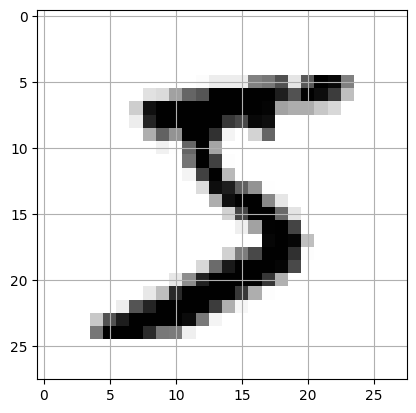

In [78]:
plot_digit(some_digit)

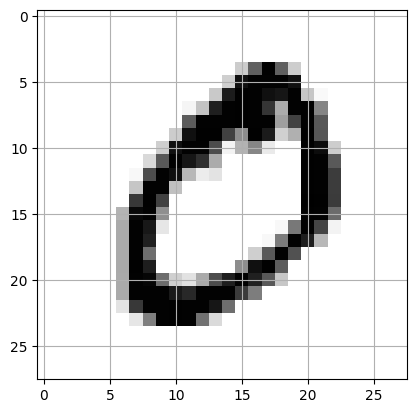

In [515]:
some_digit = X[0]

def dislocate_pixel(data, dx=False, dy=False):
    image = data.copy().reshape(28,28)
    
    if dx:
        for i in range(len(image)):
            x = image[i]            
            x = np.roll(x, dx)
            image[i] = x

    elif dy:
        T_image = image.T
        for j in range(len(T_image)):
            y = T_image[j]
            y = np.roll(y, dy)
            T_image[j] = y
        image = T_image.T
   
    return image.reshape([-1])



plot_digit(dislocate_pixel(X[1],dy=0))

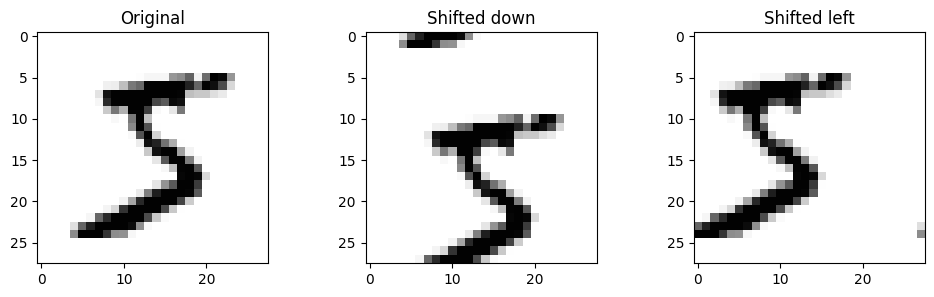

In [517]:
shifted_image_down = dislocate_pixel(some_digit, 0, 5)
shifted_image_left = dislocate_pixel(some_digit, -5, 0)

plt.figure(figsize=(12, 3))
plt.subplot(131)
plt.title("Original")
plt.imshow(some_digit.reshape(28, 28), interpolation="nearest", cmap="Greys")
####################################################
plt.subplot(132)
plt.title("Shifted down")
plt.imshow(shifted_image_down.reshape(28, 28),  interpolation="nearest", cmap="Greys")
####################################################
plt.subplot(133)
plt.title("Shifted left")
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

In [521]:
len(X)

70000

-1 0
0
1 0
0
0 1
1
0 -1
-1


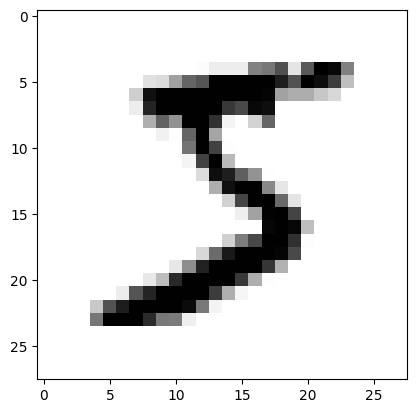

In [529]:
for d_x, d_y in ((-1, 0), (1, 0), (0, 1), (0, -1)):
    print(d_x, d_y)
    print(d_y)
    dislocate_pixel(some_digit, d_x, d_y)
    plot_digit(dislocate_pixel(some_digit, d_x, d_y))

### 3. Tackle the Titanic dataset. A great place to start is on Kaggle. Alternatively, you can download the data from https://homl.info/titanic.tgz and unzip this tarball like you did for the housing data in Chapter 2. This will give you two CSV files, train.csv and test.csv, which you can load using pandas.read_csv(). The goal is to train a classifier that can predict the Survived column based on the other columns.

### 4. Build a spam classifier (a more challenging exercise):


####     a. Download examples of spam and ham from Apache SpamAssassin’s public datasets.
 
####     b. Unzip the datasets and familiarize yourself with the data format.
 
####     c. Split the data into a training set and a test set.
 
####     d. Write a data preparation pipeline to convert each email into a feature vector. Your preparation pipeline should transform an email into a (sparse) vector that indicates the presence or absence of each possible word. For example, if all emails only ever contain four words, “Hello”, “how”, “are”, “you”, then the email “Hello you Hello Hello you” would be converted into a vector [1, 0, 0, 1] (meaning [“Hello” is present, “how” is absent, “are” is absent, “you” is present]), or [3, 0, 0, 2] if you prefer to count the number of occurrences of each word. You may want to add hyperparameters to your preparation pipeline to control whether or not to strip off email headers, convert each email to lowercase, remove punctuation, replace all URLs with “URL”, replace all numbers with “NUMBER”, or even perform stemming (i.e., trim off word endings; there are Python libraries available to do this).
 
####     e. Finally, try out several classifiers and see if you can build a great spam classifier, with both high recall and high precision.

